<h1>MOF SYNTHESIS</h1>

In [1]:
# Importing libraries
import numpy as np
import time 
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'src')))


from science_jubilee.Machine import Machine
from science_jubilee.tools.Tool import Tool
from science_jubilee.decks.Deck import Deck
from science_jubilee.labware.Labware import Labware, Location, Well
# from science_jubilee.tools.Pipette import Pipette
from science_jubilee.tools.Double_Syringe import DoubleSyringe
from science_jubilee.tools.Syringe import Syringe
from science_jubilee.tools.Vacuum_Gripper import VacuumGripper
from science_jubilee.tools.Oceandirect_axo import Spectrometer

In [2]:
# Manual Offsetting 

deck = Deck("lab_automation_deck") # We are not using the deck, so operate any deck.json 

solvents = deck.load_labware("uwsunlab_2_wellplate_60000ul_slot3.json", slot = 3, has_lid_on_top= True, currentLiquidVolume= 60)
solvents.manual_offset_small_plate([[245.0, 155.8], [197.0, 155.8]], save = True)

# -------------Position JSON file for Single Syringe ---------------------#
samples2_ssy = deck.load_labware("uwsunlab_10_wellplate_14000ul_ssy_1.json", slot = 2, has_lid_on_top= False) 
samples2_ssy.manual_offset2([[132.0, 134.0], [38.0, 134.0], [38.0, 175.0]], save = True)
samples5_ssy = deck.load_labware("uwsunlab_10_wellplate_14000ul_ssy_2.json", slot = 5, has_lid_on_top= False)
samples5_ssy.manual_offset2([[271.0, 231.0], [177.0, 231.0], [177.0, 273.0]], save = True)
    
# -------------Position JSON file for Dual Syringe ---------------#
samples2_sy = deck.load_labware('uwsunlab_10_wellplate_14000ul_sy_1.json', slot = 2, has_lid_on_top= False)       #new config
samples2_sy.manual_offset2([[130.7, 131.6],[37.7, 131.6], [37.7, 172.6]], save = True)
samples5_sy = deck.load_labware('uwsunlab_10_wellplate_14000ul_sy_2.json', slot = 5, has_lid_on_top= False)     #new config
samples5_sy.manual_offset2([[270.0, 228.0], [178.0, 228.0], [177.0, 270.0]], save = True)

precursors = deck.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot = 1, has_lid_on_top= True, currentLiquidVolume= 60)
precursors.manual_offset_small_plate([[245.0, 60.0], [197.0, 60.0]], save = True)

# -----------Position JSON file for Spectrometer----------------# 
samples2_spec = deck.load_labware('uwsunlab_10_wellplate_14000ul_spec_1.json', slot = 2, has_lid_on_top= False)   #new config
samples2_spec.manual_offset2([[130.6, 133.1],[35.7, 133.0], [35.6, 173.7]], save = True)
samples5_spec = deck.load_labware('uwsunlab_10_wellplate_14000ul_spec_2.json', slot = 5, has_lid_on_top= False)   #new config
samples5_spec.manual_offset2([[269.8, 229.3], [176.3, 230.0], [176.6, 271.2]], save = True)

Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved


In [3]:
# Intialising and homing the Machine 
# Switch on the button on the machine

axo = Machine(address = '192.168.1.2')

Caution : Before running the below code cell, please remove any labwares on slot0 and slot1 before homing. 


In [4]:
axo.home_all()
axo.move_to(z=180) # Safest Z location

In [5]:
# Loading the labwares
# Select 2 for everything

deck = axo.load_deck("lab_automation_deck")

solvents = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot3.json', slot= 3, has_lid_on_top= True, currentLiquidVolume= 60)
solvents.load_manualOffset()
trash = (-0.9, 55.8, 99)

## ---------------------Single Syringe Pump ----------------------------##
samples2_ssy = axo.load_labware('uwsunlab_10_wellplate_14000ul_ssy_1.json', slot= 2, has_lid_on_top= False)         #new config
samples2_ssy.load_manualOffset()
samples5_ssy = axo.load_labware('uwsunlab_10_wellplate_14000ul_ssy_2.json', slot= 5, has_lid_on_top= False)         #new config
samples5_ssy.load_manualOffset()

## ---------------------Dual Syringe Pump ----------------------------##
samples2_sy = axo.load_labware('uwsunlab_10_wellplate_14000ul_sy_1.json', slot= 2, has_lid_on_top= False)         #new config
samples2_sy.load_manualOffset()
samples5_sy = axo.load_labware('uwsunlab_10_wellplate_14000ul_sy_2.json', slot= 5, has_lid_on_top= False)         #new config
samples5_sy.load_manualOffset()

precursors = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot= 1, has_lid_on_top= True, currentLiquidVolume= 60)
precursors.load_manualOffset()

## --------------------------Spectrometer -------------------------------##
samples2_spec = axo.load_labware('uwsunlab_10_wellplate_14000ul_spec_1.json', slot= 2, has_lid_on_top= False)  #new config
samples2_spec.load_manualOffset()
samples5_spec = axo.load_labware('uwsunlab_10_wellplate_14000ul_spec_2.json', slot= 5, has_lid_on_top= False)  #new config
samples5_spec.load_manualOffset()

## ------------------------Vacuum Gripper --------------------------------##
vacuum_location = {0: {"loc": (84, 51, 0), "labwares_list": []},                                             # Slot 0
                   1: {"loc": (225, 57, 0), "labwares_list": [precursors]},                                  # Slot 1 (2 Precursor Container)
                   2: {"loc": (84, 147, 0), "labwares_list": [samples2_ssy, samples2_sy, samples2_spec]},    # Slot 2 (10 Well Plate)
                   3: {"loc": (225, 149, 0), "labwares_list": [solvents]},                                   # Slot 3 (Solvent & Cleansing liquid Container)
                   4: {"loc": (79, 244, 0), "labwares_list": []},                                            # Slot 4 (Lid Containter)
                   5: {"loc": (221, 244, 0), "labwares_list": [samples5_ssy, samples5_sy, samples5_spec]}  }  # Slot 5 (10 Well Plate)                        

Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 


In [6]:
# Loading the Dual Syringe

single_syringe = Syringe(index = 0, 
                        name = 'single_syringe', 
                        config = 'single_syringe')
# You always need to load your tool to the machine
axo.load_tool(single_syringe)


# Loading the Dual Syringe

dual_syringe = DoubleSyringe(index = 2, 
                        name = 'Dual_Syringe', 
                        config = '10cc_syringe')
# You always need to load your tool to the machine
axo.load_tool(dual_syringe)



# Load the Vacumm Gripper
gripper = VacuumGripper(index = 4, 
                        name = 'Vacuum_Gripper', 
                        vacuum_pin = 0,
                        limit_switch_pin = 2)
axo.load_tool(gripper)

Fill in the relevant details as parameters before running the Spectrometer initialization code block 

In [7]:
# Load the spectrometer

spectrometer = Spectrometer(index = 3, 
                            name = 'Spectrometer', 
                            base_dir=r"C:\Axo\science-jubilee\axo\spectrum_data",
                            experiment_name= 'ZIF-67 Synthesis', 
                            operator_name= 'Aditya_and_Hardik',
                            target_compound='ZIF-67', 
                            # project_id = 'MOF_Phase1', 
                            experiment_notes= 'Synthesis of a single vial of MOF - First run', 
                            solvent = 'methanol', 
                            temperature_c= 25)
                            # ref_dark = 'dark_20250708_165121.npy',
                            # ref_white = 'white_20250708_165110.npy')
axo.load_tool(spectrometer)

Opened Spectrometer 2


Caution:  
1. MAKE SURE THAT THE TOOLS ARE ALL IN THEIR CORRECT PLACE. DO A TEST RUN OF PICKING UP AND PARKING ALL THE TOOLS BEFORE STARTING THE EXPERIMENT  

2. Ensure all labwares including the precursors and the samples are in the correct slot

3. Single Syringe needs to be manually resetted before each experiment

4. Dual Syringe needs to be manually resetted beefore each experiment

5. Make sure the beaker and the vials have the same amount of liquid as mentioned in the initialization of the labwares 

Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Positioned Probe to collect the dark reference spectrum. 
Kindly switch off the probe light
Recording dark reference spectrum
Kindly switch on the probe light
Recording white reference spectrum
Configured Spectrometer
Parked Spectrometer
Picked Up Vacuum Gripper
Picked Lid from Slot 1 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Dual Syringe
Dual Syringe Refilled
Parked Dual Syringe
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 1
Parked Vacuum Gripper
Picked Up Single Syringe
Vial A1 on Slot 2 filled with 7.2625 ml solvent
Single Syringe reset and position: -0.0
Parked Single Syringe
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 1 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Dual Syringe
Vial A1 on Slot 2 filled with 1.66 ml met

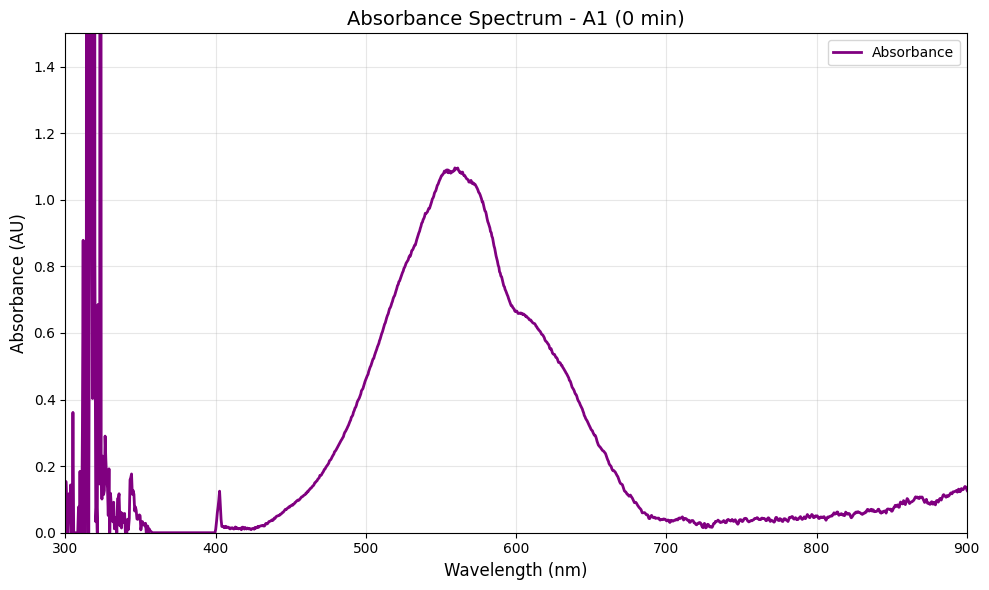

Spectrum recorded for vial A1 on Slot 2 at 0 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Dual Syringe
Dual Syringe Drive 0 reset and position: -0.0
Dual Syringe Drive 1 reset and position: 15.1
Parked Dual Syringe
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 1
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_15min_absorbance.png


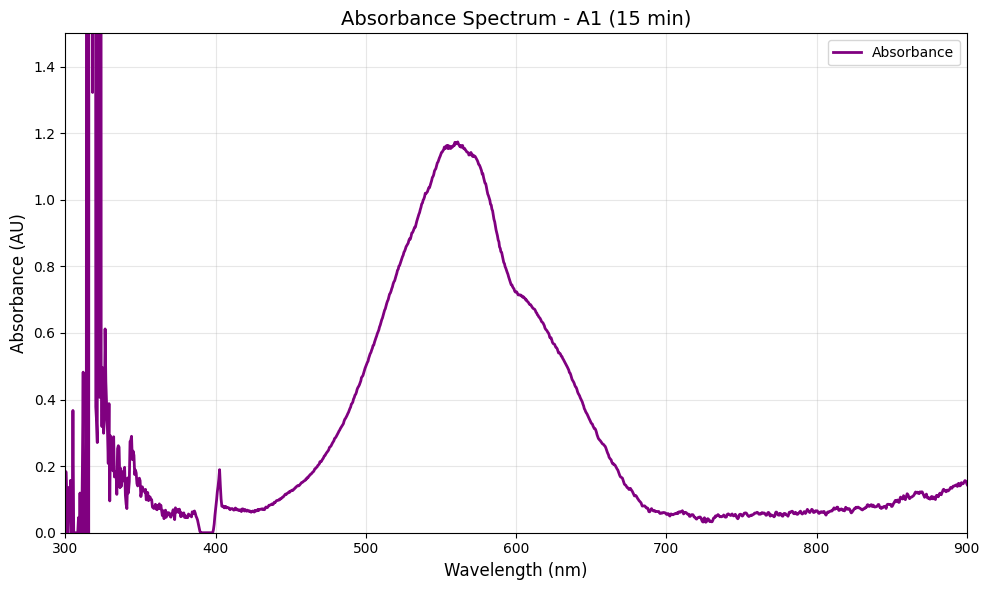

Spectrum recorded for vial A1 on Slot 2 at 15 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_30min_absorbance.png


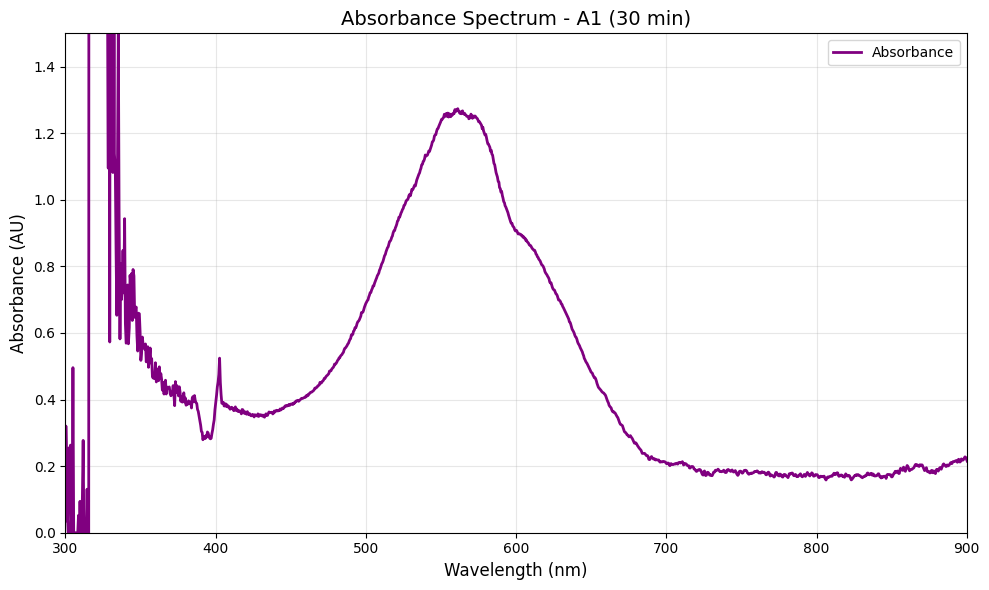

Spectrum recorded for vial A1 on Slot 2 at 30 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_45min_absorbance.png


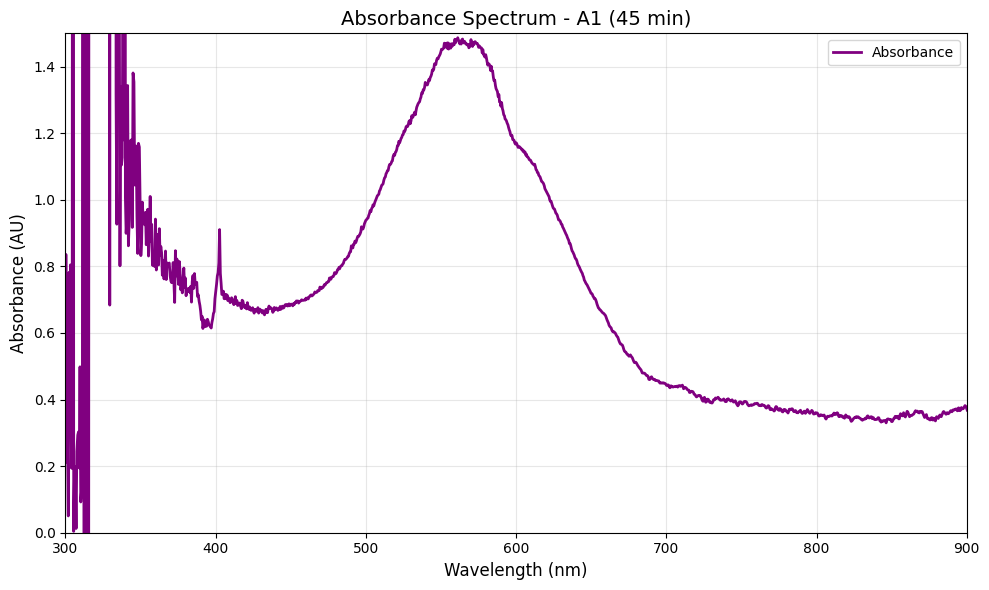

Spectrum recorded for vial A1 on Slot 2 at 45 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_60min_absorbance.png


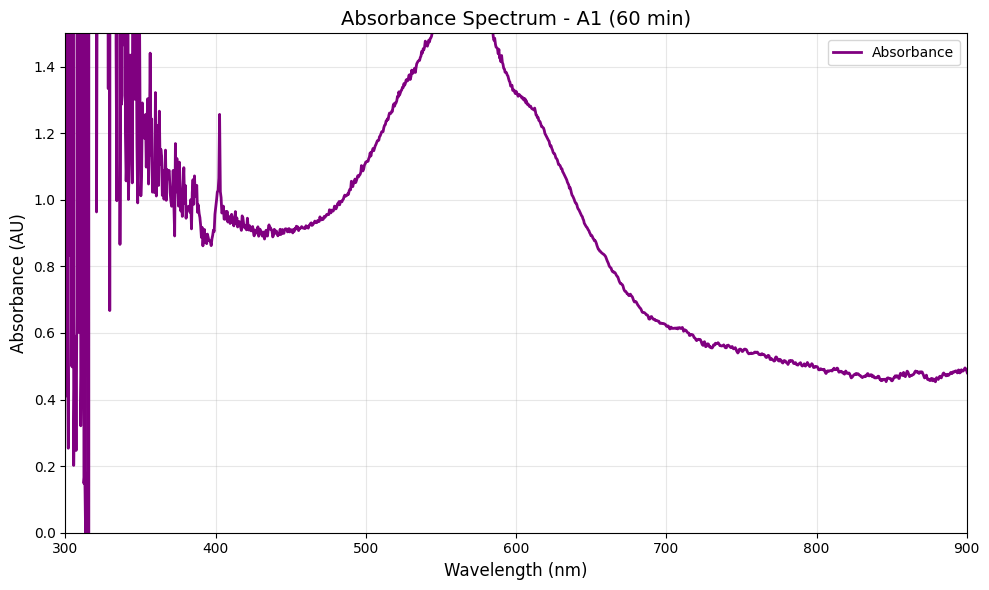

Spectrum recorded for vial A1 on Slot 2 at 60 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_75min_absorbance.png


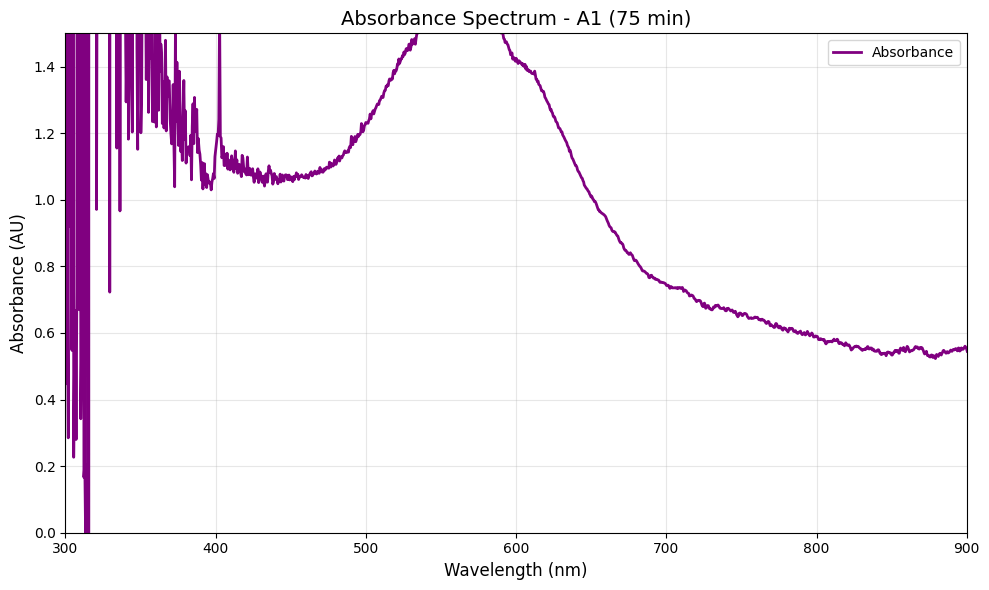

Spectrum recorded for vial A1 on Slot 2 at 75 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_90min_absorbance.png


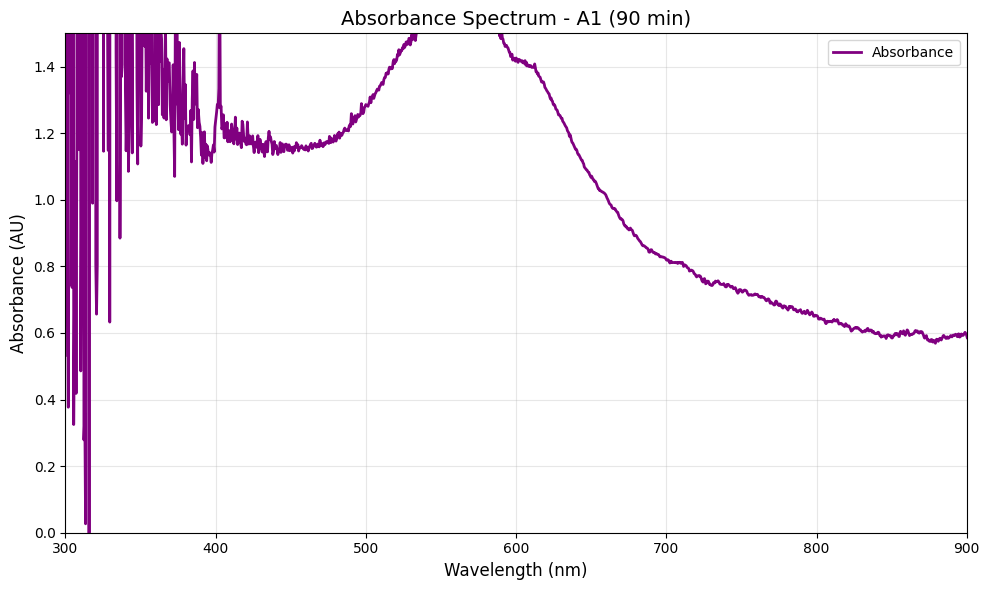

Spectrum recorded for vial A1 on Slot 2 at 90 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_105min_absorbance.png


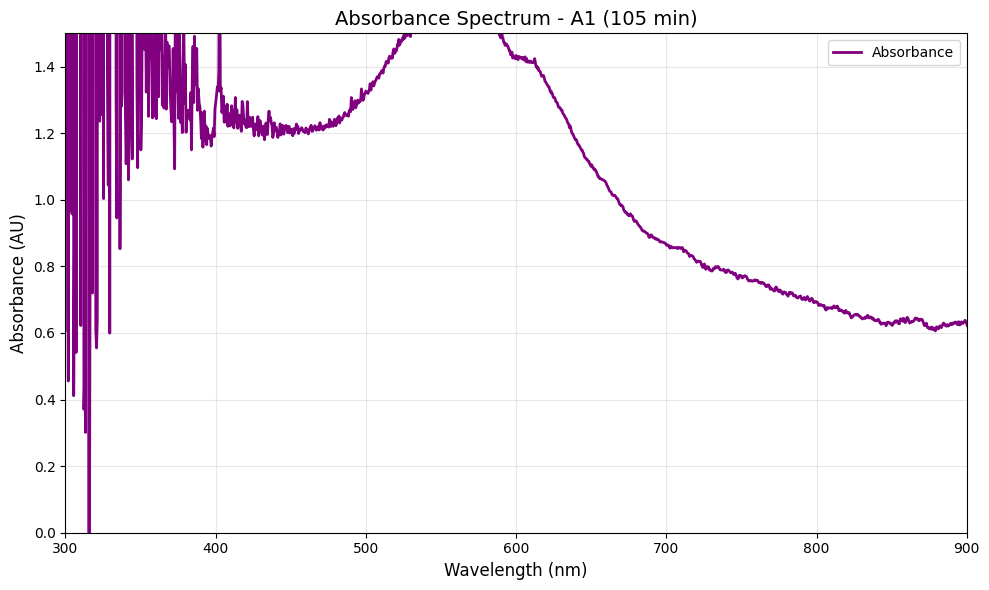

Spectrum recorded for vial A1 on Slot 2 at 105 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_120min_absorbance.png


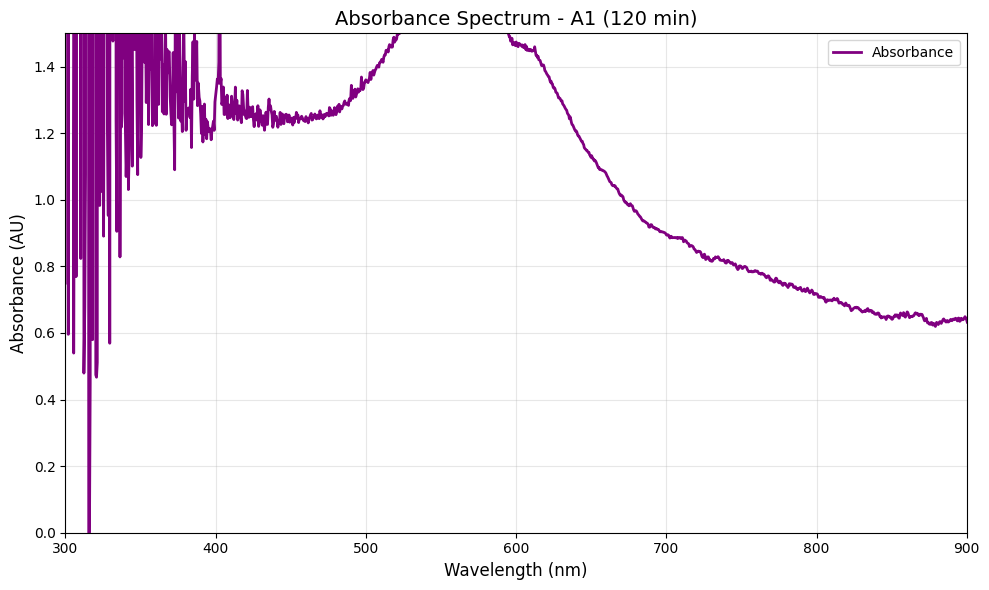

Spectrum recorded for vial A1 on Slot 2 at 120 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_135min_absorbance.png


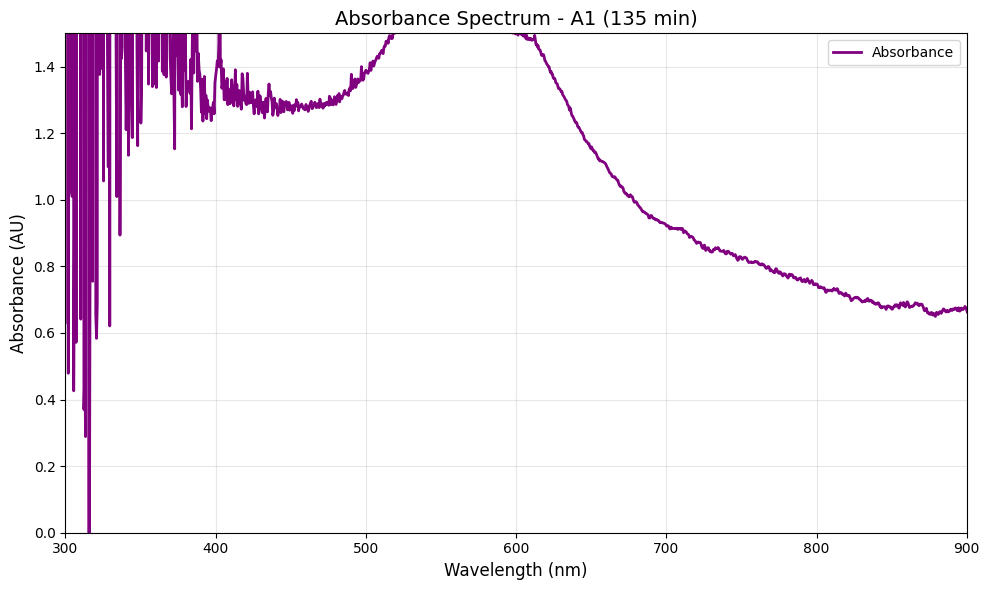

Spectrum recorded for vial A1 on Slot 2 at 135 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_150min_absorbance.png


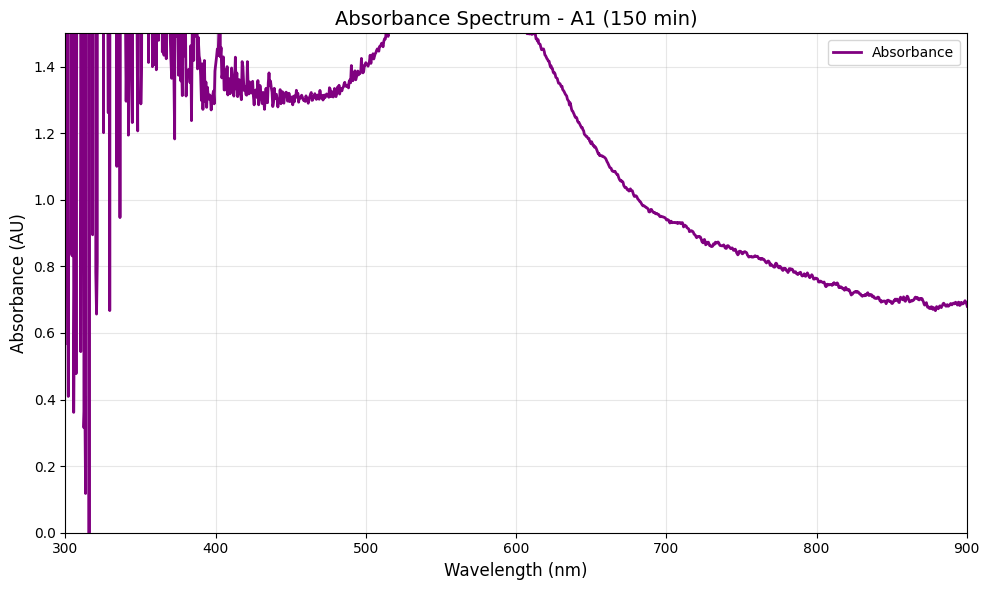

Spectrum recorded for vial A1 on Slot 2 at 150 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_165min_absorbance.png


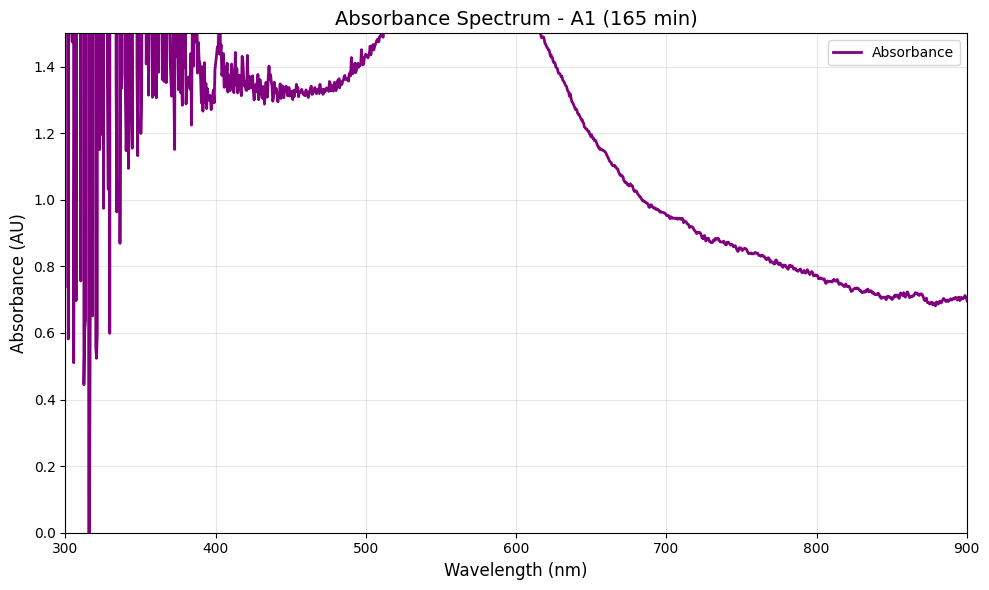

Spectrum recorded for vial A1 on Slot 2 at 165 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 2 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 3 and Placed Lid in Slot 4
Parked Vacuum Gripper
Picked Up Spectrometer
Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-25\Aditya_and_Hardik\ZIF-67 Synthesis_Aditya_and_Hardik_20250725_221848\spectra\A1_180min_absorbance.png


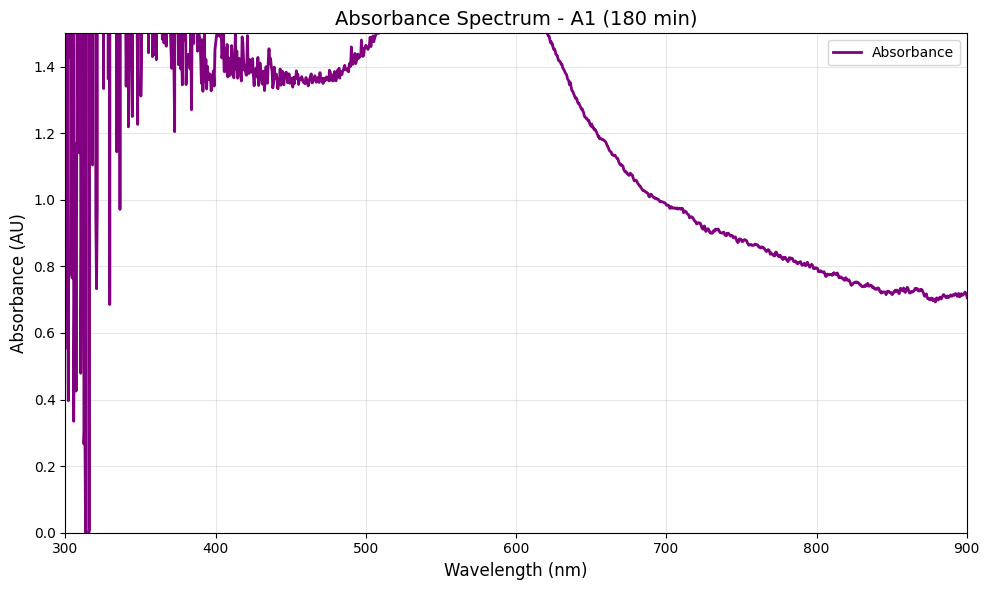

Spectrum recorded for vial A1 on Slot 2 at 180 mins
Washed Spectrometer Probe
Parked Spectrometer 
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 3
Parked Vacuum Gripper
Picked Up Vacuum Gripper
Picked Lid from Slot 4 and Placed Lid in Slot 2
Parked Vacuum Gripper


In [8]:
# making a list of all the above loaded labware, tools and Machine objects 
all_labwares = {"slot1": {"precursors": precursors}, 
               "slot2": {"samples2_ssy":samples2_ssy, "samples2_sy": samples2_sy, "samples2_spec": samples2_spec},
               "slot3": { "solvents": solvents},
               "slot4": {"vacuum_location": vacuum_location},
               "slot5": { "samples5_ssy": samples5_ssy, "samples5_sy": samples5_sy, "samples5_spec": samples5_spec} }

all_tools = {"single_syringe": single_syringe, "dual_syringe": dual_syringe, "spectrometer": spectrometer, "gripper": gripper} 

from science_jubilee.Experiment import Experiment

# Initialising the Experiment 
exp = Experiment(machine= axo, deck = deck, all_tools= all_tools, all_labwares= all_labwares)

# Running the experiment
exp.make_batch(r"C:\Axo\science-jubilee\axo\axo_api_testing\draft_synthesis_plan.json")


In case of an error and the synthesis stops midway, reset both the syringes first

In [ ]:
axo.pickup_tool(dual_syringe)
print("Picked Up Dual Syringe")

drive0 = dual_syringe.e0_drive
current_pos0 = float(dual_syringe._machine.get_position()[drive0])
headroom_mm0 = current_pos0 - dual_syringe.min_range
headroom_ml0 = headroom_mm0 / dual_syringe.mm_to_ml
dual_syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[0], s=500)
current_pos = float(dual_syringe._machine.get_position()[drive0])
print("Dual Syringe Drive 0 reset and position:", current_pos)

drive1 = dual_syringe.e1_drive
current_pos1 = float(dual_syringe._machine.get_position()[drive1])
headroom_mm1 = current_pos1 - dual_syringe.min_range
headroom_ml1 = headroom_mm1 / dual_syringe.mm_to_ml
dual_syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=500)
current_pos = float(dual_syringe._machine.get_position()[drive1])
print("Dual Syringe Drive 1 reset and position:", current_pos)

axo.park_tool()
print("Parked Dual Syringe")

Picked Up Dual Syringe
Error : Lid is on top of wellPlate: uwsunlab_2_wellplate_60000ul_slot1  on 1
Dual Syringe Drive 0 reset and position: 0.0
Error : Lid is on top of wellPlate: uwsunlab_2_wellplate_60000ul_slot1  on 1
Dual Syringe Drive 1 reset and position: 0.0
Parked Dual Syringe


In [ ]:
axo.pickup_tool(single_syringe)
print("Picked Up Single Syringe")

# single_syringe.dispense(vol= 5, sample_loc= samples2_ssy[0].top(10), refill_loc= solvents[1].top(10), s= 100)
# print("Dispensed 5ml solvent")


drive = single_syringe.e_drive
current_pos = float(single_syringe._machine.get_position()[drive])
headroom_mm = current_pos - single_syringe.min_range
headroom_ml = headroom_mm / single_syringe.mm_to_ml
single_syringe.dispense(vol= headroom_ml, sample_loc=solvents[1].top(-10), refill_loc=solvents[1].top(-10), s=500)
current_pos = float(single_syringe._machine.get_position()[drive])
print("Single Syringe reset and position:", current_pos)

axo.park_tool()
print("Parked Single Syringe")

In [ ]:
# Vacuum Gripper functions 

axo.pickup_tool(gripper)
print("Picked Up Vacuum Gripper")

gripper.pick_and_place(vacuum_location[3],
                       vacuum_location[4], 0.7, 3)
print("Placed the plate") 

# gripper.drop(vacuum_location[4], 3)
# gripper.grip(vacuum_location[3], 0.7, 3)

axo.park_tool()
print("Parked Vacuum Gripper")

In [ ]:
# Spectrometer functions 

axo.pickup_tool(spectrometer)
print("Picked Up Spectrometer")

spectrometer.set_dark()
spectrometer.set_white()

spectrometer.configure_device()
print("Configured Spectrometer")

spectrometer.record_mof_recipe(well_id= "A1", metal_precursor_name= 'Fe_in_methanol', metal_precursor_vol_ml = 1, organic_precursor_name= 'Mn', organic_precursor_vol_ml = 1, solvent_name= 'methanol', solvent_vol_ml= 5)
wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples2_spec[0].top(-45), 0, save= True)
spectrometer.plot_spectrum(samples2_spec[0].top(-40), elapsed_min=0, show_plot=True, save_plot=True)  
print("Collected Blue Spectrum")